# Financial Analytics : Conducting Statistical tests on companies


By : Sricharan Mahavadi



## DATA IMPORT

### Import Necessary Libraries andf Packages

In [ ]:
# import libraries
from google.colab import files
import pandas as pd
import numpy as np
# libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Read file into Pandas DataFrame

In [ ]:
# store the dataset in "assign1TuTh.csv" as a panda dataframe named df
df = pd.read_csv('assign1TuTh.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ind                  516 non-null    int64  
 1   ticker               516 non-null    object 
 2   COGS_Frac            516 non-null    float64
 3   SGA_Frac             516 non-null    float64
 4   Inventory_Assets     516 non-null    float64
 5   PPE_Assets           516 non-null    float64
 6   LongTermDebt_Assets  516 non-null    float64
 7   ATR                  516 non-null    float64
 8   log_Size             516 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 36.4+ KB


### Inspect the variables

Note variable descriptions are listed in Assignment

In [ ]:
df.describe()

,ind,COGS_Frac,SGA_Frac,Inventory_Assets,PPE_Assets,LongTermDebt_Assets,ATR,log_Size
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,3.988372,0.591959,0.408041,0.115081,0.255780,0.198428,0.907719,6.303572
std,2.135202,0.264087,0.264087,0.127293,0.246548,0.244597,0.833978,2.537985
min,1.000000,0.001517,0.011377,0.000000,0.000000,0.000000,0.000176,-3.170086
25%,3.000000,0.386002,0.189835,0.008937,0.070039,0.021981,0.423760,4.742304
50%,3.000000,0.662988,0.337012,0.075136,0.149917,0.138042,0.691966,6.543533
75%,5.000000,0.810165,0.613998,0.183567,0.412352,0.292361,1.086648,8.096422
max,7.000000,0.988623,0.998483,0.781892,0.951993,2.175809,4.862069,13.044780


### Graph the frequencies of each industry (Both training and validation samples)

<Axes: >

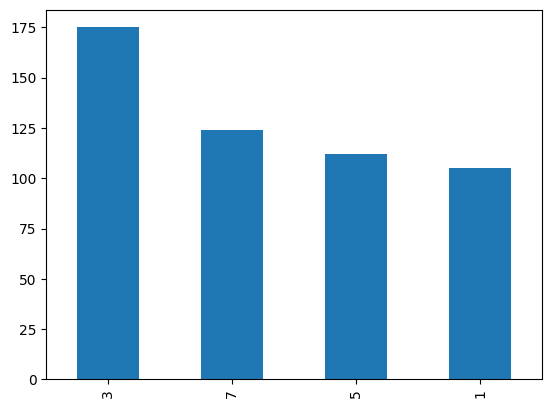

In [ ]:
df.ind.value_counts().plot(kind = 'bar')

## Dealing with Outliers

In [ ]:
import pandas as pd

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

#defining the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identifying outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

outlier_rows = df[outliers]


<ipython-input-69-a2c6542f7c48>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-69-a2c6542f7c48>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-69-a2c6542f7c48>:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)


Outlier Analysis:

COGS_Frac (Cost of Goods Sold Fraction):
- Values range from around 0.02 to 0.99.
- Outliers exist at both extremes, indicating significant variations in COGS fractions among companies.

SGA_Frac (Selling, General, and Administrative Expenses Fraction):
- Ranges from about 0.01 to 0.98.
- Outliers are observed on both ends, suggesting varied levels of SGA expenses among companies.

Inventory_Assets:
- Most values are relatively low, with some companies having zero inventory assets.
- Outliers may represent companies with exceptionally high inventory assets.

PPE_Assets (Property, Plant, and Equipment Assets):
- The range varies, with some companies having substantial PPE assets while others have none.
- Outliers could indicate companies with extreme values of PPE assets.

LongTermDebt_Assets:
- Values range from 0 to around 4.75.
- Outliers may indicate companies with high long-term debt relative to their total assets.

ATR (Asset Turnover Ratio):
- ATR values vary significantly, ranging from around -3 to 9.
- Outliers might represent extreme volatility or stability in stock prices.

log_Size:
- Logarithmic size values show a wide range, from around -3 to 9.
- Outliers could indicate companies with significantly larger or smaller market capitalization compared to others.


### Creating Box Plots to visualize Outliers

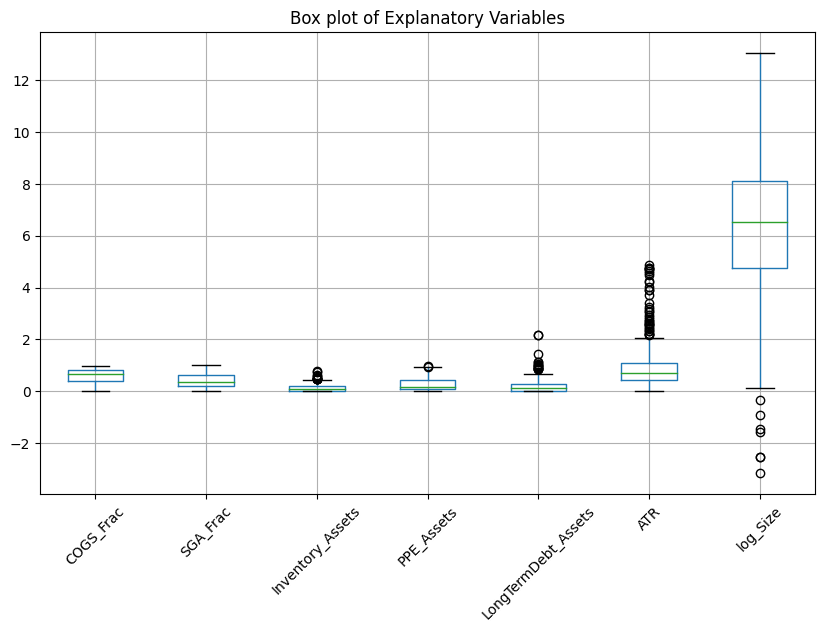

In [ ]:
import matplotlib.pyplot as plt

explanatory_variables = ['COGS_Frac', 'SGA_Frac', 'Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR', 'log_Size']
explanatory_df = df[explanatory_variables]

plt.figure(figsize=(10, 6))
explanatory_df.boxplot()
plt.xticks(rotation=45)
plt.title('Box plot of Explanatory Variables')
plt.show()


### Dealing with the Outliers : Using Winsorization

In [ ]:
from scipy.stats.mstats import winsorize
limits = (0.01, 0.01)

df = df.apply(lambda x: winsorize(x, limits=limits))

df.head()

,ind,ticker,COGS_Frac,SGA_Frac,Inventory_Assets,PPE_Assets,LongTermDebt_Assets,ATR,log_Size
0,1,KEWL,0.119197,0.880803,0.000000,0.359319,0.000000,0.017352,2.744704
1,1,CHNR,0.293173,0.706827,0.002285,0.010669,0.226878,0.063455,3.837192
2,1,TVCCF,0.863738,0.136262,0.000000,0.000000,0.000000,4.647827,1.669592
3,1,TIMCF,0.886627,0.113373,0.105259,0.702905,0.453825,0.940332,4.189640
4,1,MTA,0.351079,0.648921,0.000000,0.881689,0.040760,0.018435,4.874350


Dealing with Outliers using Winsorization

Key Points:

- **Winsorization** is a technique used to handle outliers by clipping extreme values in a dataset to predefined percentiles.(from class documentation)
- **Limits**: The `limits` parameter in the `winsorize` function specifies the proportion of data to be clipped from both the lower and upper tails of the distribution.
- **Result**: After Winsorization, extreme values in each variable are replaced with values at the defined limits, reducing the impact of outliers while preserving the overall distribution of the data.


## Posible scatter combinations of Explainatory Variables

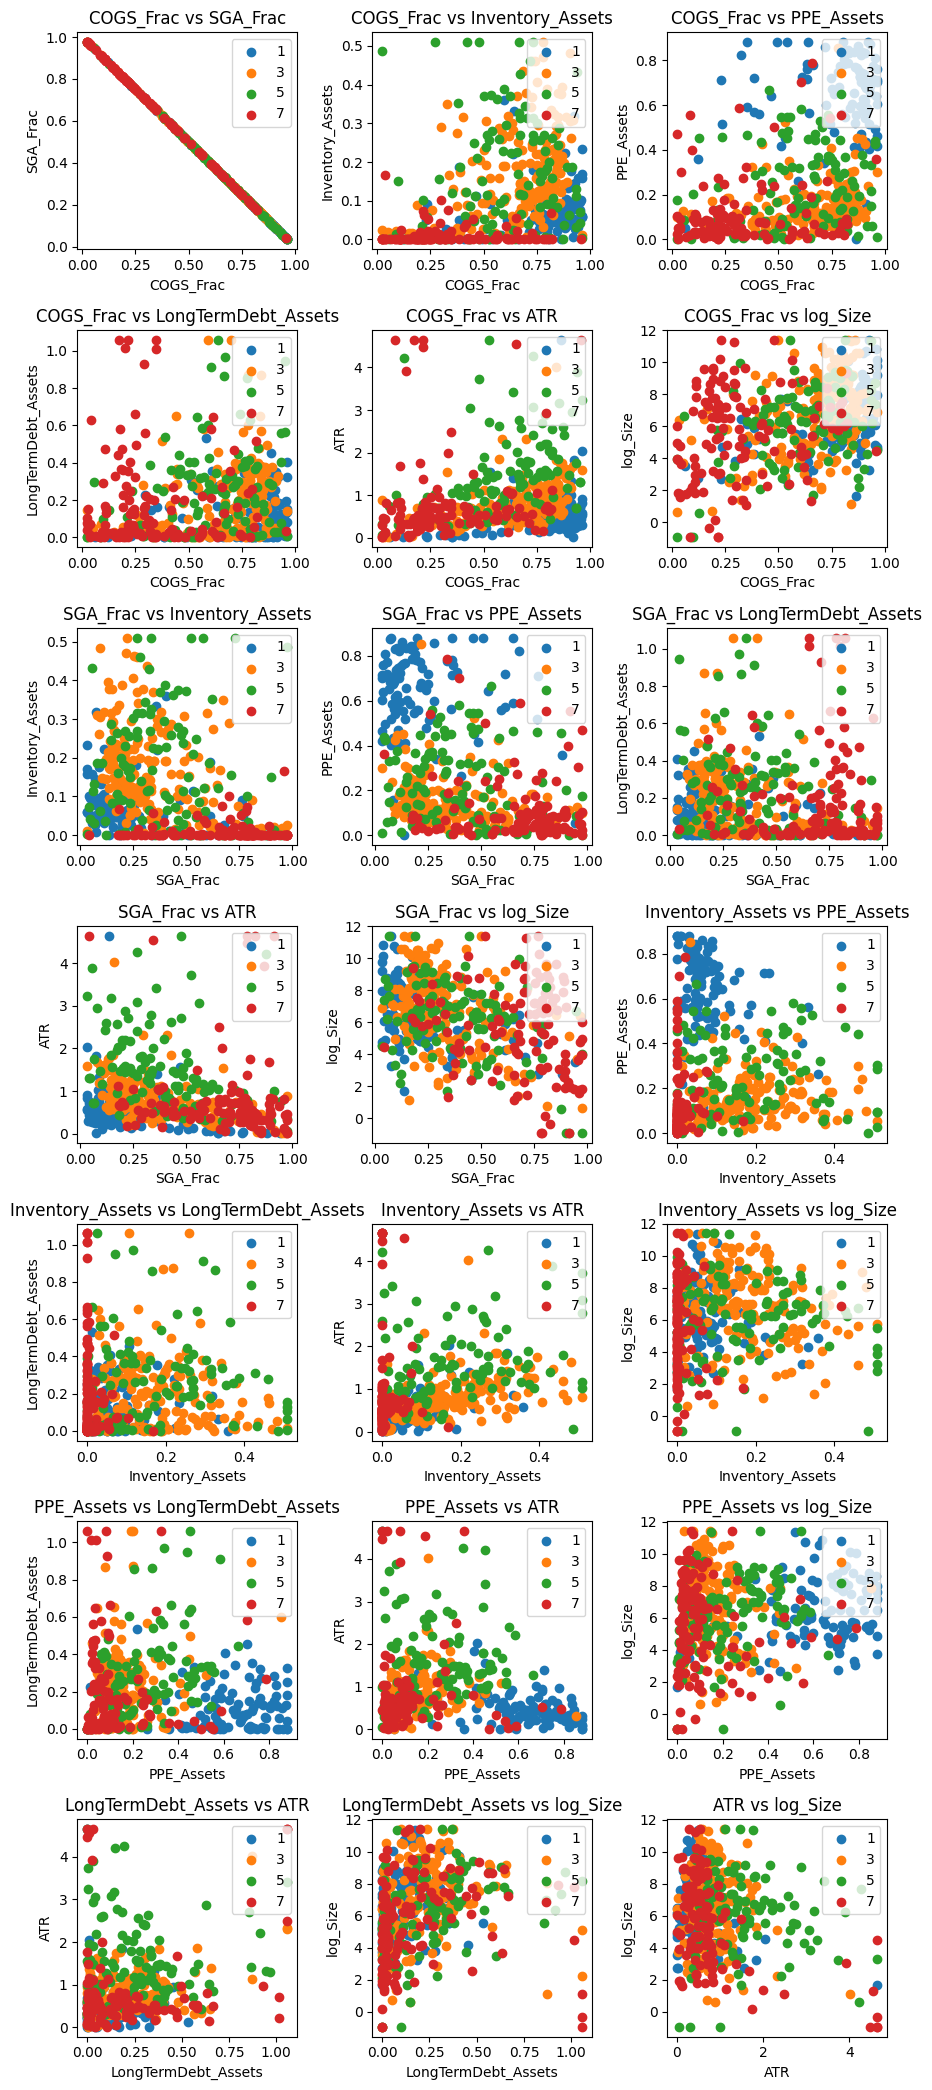

In [ ]:
import itertools

def plot_variable_combinations(df, target='ind', variables=None):
    """
    Plot scatter plots of various combinations of explanatory variables from the df.

    Arguments within this code:
        df (pandas.DataFrame): The input DataFrame containing the variables.
        target (str, optional): The target variable for grouping data points. Default is 'ind'.
        variables (list, optional): The list of variables to create scatter plots for. If None, a default list is used.
    """
    if variables is None:
        variables = ['COGS_Frac', 'SGA_Frac', 'Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR', 'log_Size']

    # generating all possible combinations (only considering 2 variables at a time)
    combinations = list(itertools.combinations(variables, 2))

    # num of subplots and rows needed (in this case taking 3 for easier interpretation)
    num_plots = len(combinations)
    num_rows = (num_plots + 2) // 3

    fig, axes = plt.subplots(num_rows, 3, figsize=(9, 3 * num_rows))

    # code to iterate
    # references : https://stackoverflow.com/questions/30712802/why-does-saveinbackgroundwithblock-only-work-once-in-my-parse-enabled-class/30719288#30719288
    # references : https://stackoverflow.com/questions/45815701/remove-white-space-in-table-view

    if num_plots == 1:
        axes = [axes]

    # iterating over each combination and create scatter plots
    for idx, combination in enumerate(combinations):
        ax = axes[idx // 3, idx % 3]  # for subplot indexing
        for i in df.ind.unique():
            ax.scatter(x=combination[0], y=combination[1], data=df[df.ind == i], label=i)
        ax.legend(loc='upper right')
        ax.set_xlabel(combination[0])
        ax.set_ylabel(combination[1])
        ax.set_title(f'{combination[0]} vs {combination[1]}')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_variable_combinations(df)


Analysis of Scatter plots:


The COGS_Frac (Cost of Goods Sold Fraction) has a strong negative correlation with SGA_Frac (Selling, General, and Administrative Expenses Fraction), indicating that companies with a higher proportion of costs allocated to COGS tend to have a lower proportion allocated to SGA expenses, and vice versa.

There is a noticeable clustering of points at COGS_Frac around 0.5, suggesting that many companies in the dataset have a balanced allocation of costs between COGS and SGA.

The relationship between COGS_Frac and Inventory_Assets or PPE_Assets appears to be weak, with a wide spread of points across the range of COGS_Frac values.

Companies with higher LongTermDebt_Assets ratios tend to have lower COGS_Frac values, indicating a potential relationship between capital structure and cost allocation.

The scatter plots involving ATR (Asset Turnover Ratio) and log_Size (a measure of company size) exhibit a wide range of values, suggesting diversity in asset utilization and company sizes within the dataset.

Certain industries (denoted by color) seem to exhibit distinct patterns or clustering in some of the scatter plots, indicating potential industry-specific characteristics or norms.

Top Conclusions:
- Cost structure and allocation between COGS and SGA expenses appear to be a defining characteristic of the companies in the dataset, with many exhibiting a balanced approach. This could be indicative of mature industries or established business models.
- The relationship between capital structure (as represented by LongTermDebt_Assets) and cost allocation (COGS_Frac) suggests that companies with higher leverage may prioritize cost-cutting measures or have different operational strategies compared to those with lower debt levels.
- The diversity in asset utilization (ATR) and company sizes (log_Size) within the dataset highlights the importance of considering these factors when analyzing and comparing financial ratios and metrics, as they may significantly impact business strategies and performance.
- Industry patterns: The plots clearly show clustering and distinct patterns for different industries based on their operational characteristics. For example, metal mining firms (orange) tend to have lower COGS fractions, higher asset intensities (inventory, PPE), and lower asset turnover ratios compared to manufacturing or retail firms.
- Trade-offs in asset composition: There appears to be a negative relationship between inventory and PPE asset intensities, suggesting firms tend to be more intensive in one or the other type of operating assets based on their business models. Additionally, higher inventory levels are associated with higher long-term debt levels.
- Limited linear relationships among ratios: While there are some expected accounting relationships (e.g., COGS_Frac vs SGA_Frac), most of the other financial ratios like COGS_Frac, Inventory_Assets, ATR do not exhibit clear linear correlations with each other. This suggests that the relationships between these operational drivers are more complex and likely depend on multiple factors beyond simple linear associations.


##Performing Logistic Regression to determine the accuracy

### 2 variable prediction

In [ ]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

def evaluate_variable_combinations(df, target='ind', predictors=None, model=LogisticRegression(), test_size=0.3, random_state=42):
    if predictors is None:
        predictors = ['COGS_Frac', 'SGA_Frac', 'Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR', 'log_Size']

    #generating variable combinations (2 variables)
    variable_combinations = list(combinations(predictors, 2))

    #storing results
    results = {}

    #interating through combinations
    for combination in variable_combinations:
        X = df[list(combination)]
        y = df[target]

        #train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        #model fitting
        model.fit(X_train, y_train)

        #predicting
        predictions = model.predict(X_test)

        #accuracy calcualtion
        acc = accuracy_score(y_test, predictions)

        #storing accuracies for comaprision and sorting
        results[combination] = acc

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    print("Accuracy results for all variable combinations:")
    for combination, accuracy in sorted_results.items():
        print(f"Explainatory variables selected : {combination} |   Accuracy: {accuracy:.4f}")

    print("\nConfusion matrices for the top 3 performing models:")
    for combination in list(sorted_results.keys())[:3]:
        print(f"Confusion matrix for variables{combination}:")
        print(confusion_matrix(y_test, predictions))
        print('-' * 50)

    return sorted_results

results = evaluate_variable_combinations(df)


Accuracy results for all variable combinations:
Explainatory variables selected : ('Inventory_Assets', 'PPE_Assets') |   Accuracy: 0.7032
Explainatory variables selected : ('COGS_Frac', 'PPE_Assets') |   Accuracy: 0.6710
Explainatory variables selected : ('SGA_Frac', 'PPE_Assets') |   Accuracy: 0.6710
Explainatory variables selected : ('COGS_Frac', 'ATR') |   Accuracy: 0.6581
Explainatory variables selected : ('SGA_Frac', 'ATR') |   Accuracy: 0.6581
Explainatory variables selected : ('PPE_Assets', 'ATR') |   Accuracy: 0.6065
Explainatory variables selected : ('Inventory_Assets', 'ATR') |   Accuracy: 0.5935
Explainatory variables selected : ('COGS_Frac', 'Inventory_Assets') |   Accuracy: 0.5742
Explainatory variables selected : ('SGA_Frac', 'Inventory_Assets') |   Accuracy: 0.5742
Explainatory variables selected : ('PPE_Assets', 'LongTermDebt_Assets') |   Accuracy: 0.5355
Explainatory variables selected : ('PPE_Assets', 'log_Size') |   Accuracy: 0.5290
Explainatory variables selected : 

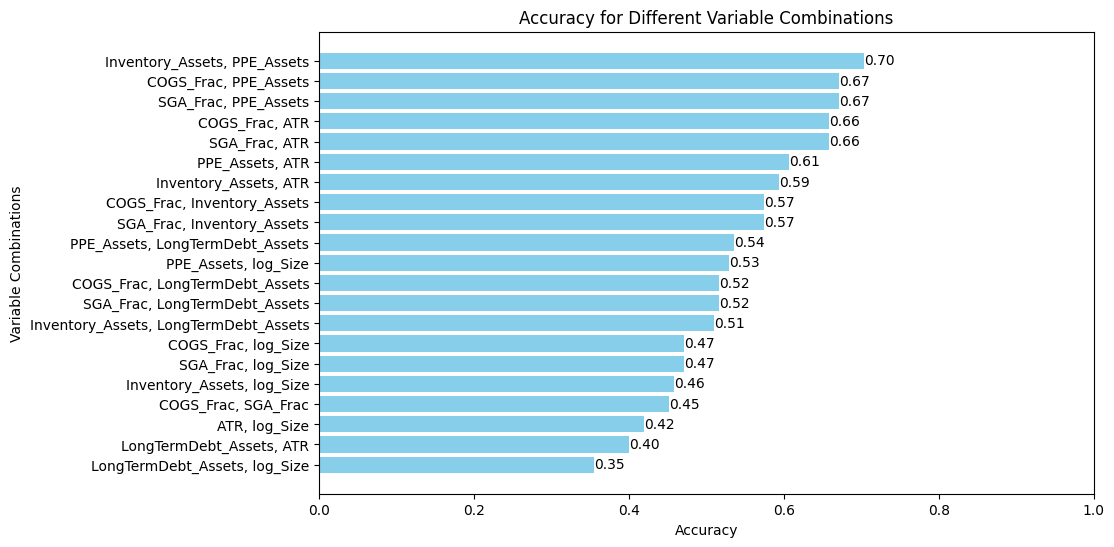

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(results):
    combinations = []
    accuracies = []

    sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

    for combination, accuracy in sorted_results:
        combinations.append(', '.join(combination))
        accuracies.append(accuracy)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(combinations, accuracies, color='skyblue')
    plt.xlabel('Accuracy')
    plt.ylabel('Variable Combinations')
    plt.title('Accuracy for Different Variable Combinations')
    plt.xlim(0, 1)
    plt.gca().invert_yaxis()

    for bar, accuracy in zip(bars, accuracies):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{accuracy:.2f}',
                 va='center', ha='left', fontsize=10, color='black')

    plt.show()

plot_accuracy(results)


Based on the above results, we can draw the following conclusions:

- The best performing model in terms of accuracy is the one using the explanatory variables 'Inventory_Assets' and 'PPE_Assets', with an accuracy of 70.32%.
- The next two best performing models have the same accuracy of 67.10%, and they use the explanatory variables ('COGS_Frac', 'PPE_Assets') and ('SGA_Frac', 'PPE_Assets'), respectively.
- The confusion matrices for the top three models are identical, suggesting that these models are classifying the instances in a similar manner.
- The models with the lowest accuracy (around 35-40%) include those with the explanatory variables ('LongTermDebt_Assets', 'log_Size') and ('LongTermDebt_Assets', 'ATR').
- Models including the variable 'log_Size' tend to perform relatively poorly compared to those without it.

What are some business reasoning/implications of above results :

- The model with 'Inventory_Assets' and 'PPE_Assets' (Property, Plant, and Equipment Assets) as explanatory variables likely captures the influence of inventory management and capital intensity on financial performance.
- Companies with efficient inventory management and appropriate levels of fixed assets are likely to have better profitability and financial health.
- 'COGS_Frac' and 'SGA_Frac' along with 'PPE_Assets' capture the cost structure of a company, which is crucial for profitability.
- Companies with lower COGS and SGA fractions (relative to revenue) are likely to have higher profit margins.
- Inclusion of 'PPE_Assets' alongside these cost variables provides context on capital intensity and asset utilization.

In summary, the best performing models capture factors related to inventory management, cost structure, asset utilization, and capital intensity, which are fundamental drivers of a company's financial performance and subsequent classification.


### Considering 3 variables

In [ ]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

def evaluate_variable_combinations(df, target='ind', predictors=None, model=LogisticRegression(max_iter=1000), test_size=0.3, random_state=42):
    if predictors is None:
        predictors = ['COGS_Frac', 'SGA_Frac', 'Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR', 'log_Size']

    #generating variable combinations (3 variables)
    variable_combinations = list(combinations(predictors, 3))

    #storing results
    results = {}

    #iterating through combinations
    for combination in variable_combinations:
        X = df[list(combination)]
        y = df[target]

        #train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        #model fitting
        model.fit(X_train, y_train)

        #predicting
        predictions = model.predict(X_test)

        #accuracy calculation
        acc = accuracy_score(y_test, predictions)

        #storing accuracies for comparison and sorting
        results[combination] = acc

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    print("Accuracy results for all variable combinations:")
    for combination, accuracy in sorted_results.items():
        print(f"Explanatory variables selected: {combination} | Accuracy: {accuracy:.4f}")

    print("\nConfusion matrices for the top 3 performing models:")
    for combination in list(sorted_results.keys())[:3]:
        X = df[list(combination)]
        y = df[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(f"Confusion matrix for variables {combination}:")
        print(confusion_matrix(y_test, predictions))
        print('-' * 50)

    return sorted_results

results = evaluate_variable_combinations(df)


Accuracy results for all variable combinations:
Explanatory variables selected: ('Inventory_Assets', 'PPE_Assets', 'ATR') | Accuracy: 0.7871
Explanatory variables selected: ('COGS_Frac', 'PPE_Assets', 'ATR') | Accuracy: 0.7419
Explanatory variables selected: ('SGA_Frac', 'PPE_Assets', 'ATR') | Accuracy: 0.7419
Explanatory variables selected: ('Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets') | Accuracy: 0.7097
Explanatory variables selected: ('COGS_Frac', 'PPE_Assets', 'LongTermDebt_Assets') | Accuracy: 0.6839
Explanatory variables selected: ('SGA_Frac', 'PPE_Assets', 'LongTermDebt_Assets') | Accuracy: 0.6839
Explanatory variables selected: ('COGS_Frac', 'Inventory_Assets', 'ATR') | Accuracy: 0.6774
Explanatory variables selected: ('SGA_Frac', 'Inventory_Assets', 'ATR') | Accuracy: 0.6774
Explanatory variables selected: ('COGS_Frac', 'SGA_Frac', 'PPE_Assets') | Accuracy: 0.6710
Explanatory variables selected: ('COGS_Frac', 'Inventory_Assets', 'PPE_Assets') | Accuracy: 0.6710
Exp

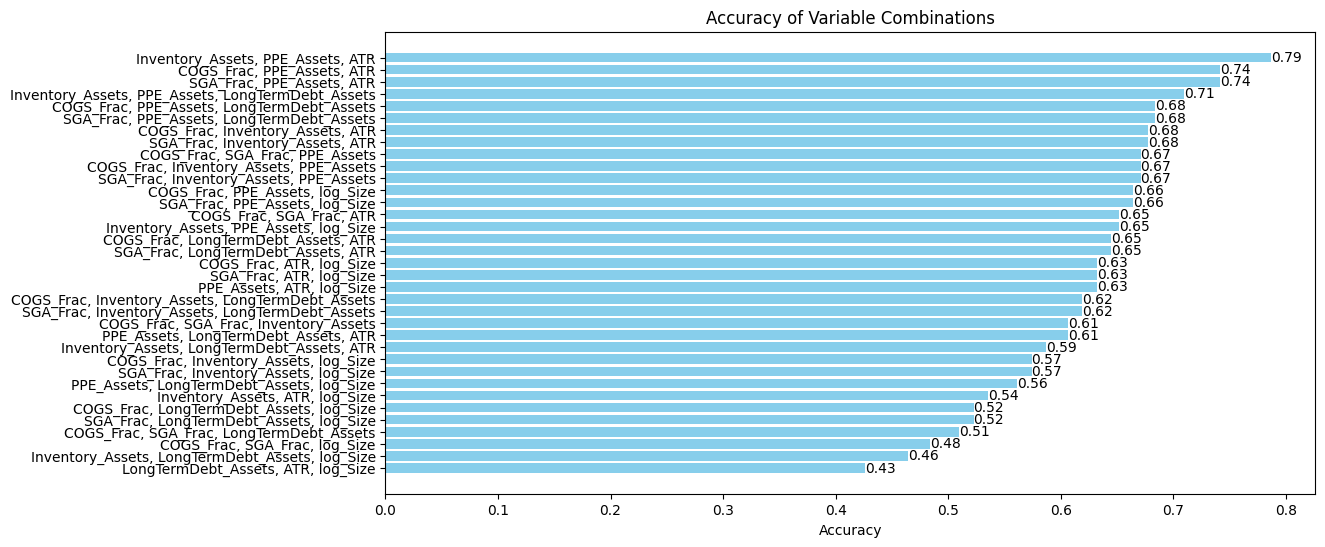

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracy_results(results):
    combinations = list(results.keys())
    accuracies = list(results.values())

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.barh(range(len(combinations)), accuracies, color='skyblue')
    ax.set_yticks(range(len(combinations)))
    ax.set_yticklabels([', '.join(combination) for combination in combinations])
    ax.invert_yaxis()

    for i, acc in enumerate(accuracies):
        ax.text(acc, i, f'{acc:.2f}', va='center')

    ax.set_xlabel('Accuracy')
    ax.set_title('Accuracy of Variable Combinations')
    plt.show()

plot_accuracy_results(results)


When we change the number of variables for the analysis , the accuracy changed. Following is the interpretation of the results :

- The best performing model in terms of accuracy is the one using the explanatory variables 'Inventory_Assets' , 'PPE_Assets' and 'ATR' which increased the accuracy to 78.71%.
- The next two best performing models have the same accuracy of 74.19%, and they use the explanatory variables ('COGS_Frac', 'PPE_Assets', 'ATR') and ('SGA_Frac', 'PPE_Assets','ATR'), respectively.
- The confusion matrices for the top three models are identical, with models 2 and 3 displaying the same amounts of misclassifications,  suggesting that these models are classifying the instances in a similar manner.
- The models with the lowest accuracy (around 35-40%) include those with the explanatory variables ('LongTermDebt_Assets', 'log_Size') and ('LongTermDebt_Assets', 'ATR').
- Models including the variable 'log_Size' tend to perform relatively poorly compared to those without it.

What are some business reasoning/implications of above results :

- ATR is an important factor in determing the industry classification , this might be due to the fact that including the Asset Turnover Ratio in predictive models improves accuracy by capturing how efficiently a company utilizes its assets to generate revenue, thus providing insights into operational efficiency and financial health.


### Considering all variable combinations for prediction

In [ ]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

def evaluate_variable_combinations(df, target='ind', predictors=None, model=LogisticRegression(max_iter = 1000), test_size=0.3, random_state=42):
    if predictors is None:
        predictors = ['COGS_Frac', 'SGA_Frac', 'Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR', 'log_Size']

    #generating variable combinations for 2, 3, 4, and 5 variables
    variable_combinations = []
    for r in range(2, min(len(predictors) + 1, 6)):
        variable_combinations.extend(combinations(predictors, r))

    #storing results
    results = {}

    #iteratig through combinations
    for combination in variable_combinations:
        X = df[list(combination)]
        y = df[target]

        #train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        #model fitting
        model.fit(X_train, y_train)

        #predicting
        predictions = model.predict(X_test)

        #accuracy calculation
        acc = accuracy_score(y_test, predictions)

        #store accuracies for comparison and sorting
        results[combination] = acc

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    print("\nTop 3 performing models:")
    top_3_combinations = list(sorted_results.keys())[:3]
    for combination in top_3_combinations:
        print(f"Top model with variables: {combination} | Accuracy: {sorted_results[combination]:.4f}")

    return sorted_results

results = evaluate_variable_combinations(df)



Top 3 performing models:
Top model with variables: ('Inventory_Assets', 'PPE_Assets', 'ATR') | Accuracy: 0.7871
Top model with variables: ('Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR') | Accuracy: 0.7677
Top model with variables: ('COGS_Frac', 'SGA_Frac', 'Inventory_Assets', 'PPE_Assets', 'ATR') | Accuracy: 0.7548


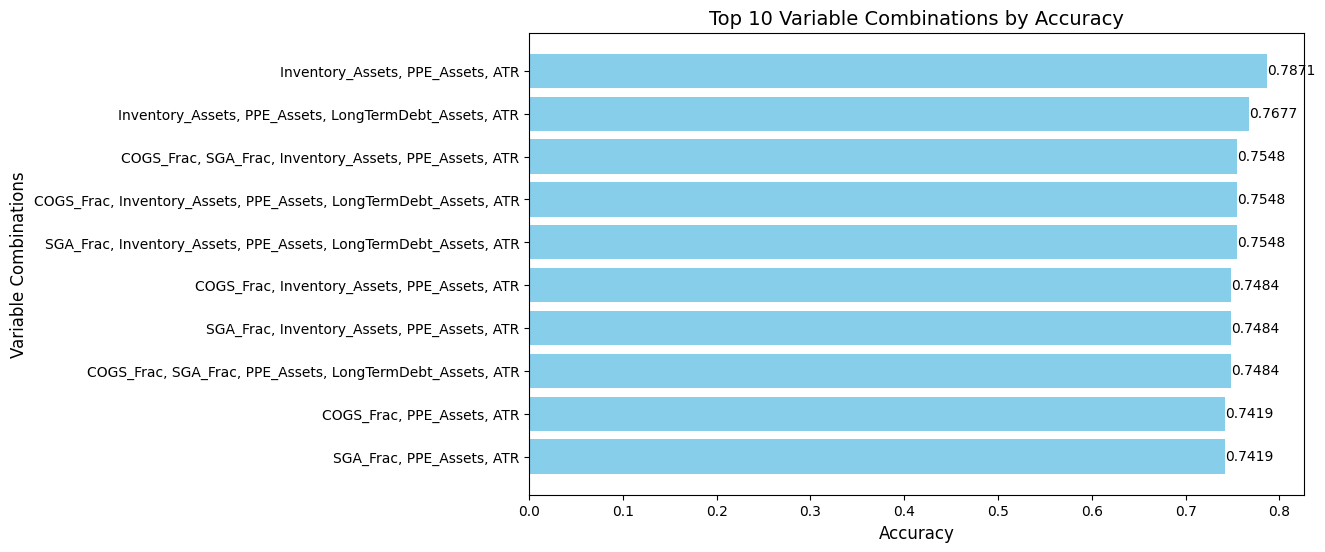

In [ ]:
import matplotlib.pyplot as plt

def plot_top_10_accuracies(results):
    # Sort the results based on accuracy in descending order
    sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
    top_10_results = sorted_results[:10]  # Select the top 10 results

    # Extract the top 10 combinations and accuracies
    top_10_combinations = [combination for combination, accuracy in top_10_results]
    top_10_accuracies = [accuracy for combination, accuracy in top_10_results]

    # Plotting the top 10 accuracies
    plt.figure(figsize=(10, 6))
    plt.barh(range(10), top_10_accuracies, color='skyblue')
    plt.yticks(range(10), [', '.join(combination) for combination in top_10_combinations], fontsize=10)
    plt.xlabel('Accuracy', fontsize=12)
    plt.ylabel('Variable Combinations', fontsize=12)
    plt.title('Top 10 Variable Combinations by Accuracy', fontsize=14)
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest accuracy on top

    # Add accuracy values on the bars
    for i, acc in enumerate(top_10_accuracies):
        plt.text(acc, i, f'{acc:.4f}', va='center', ha='left', fontsize=10)

    plt.show()

plot_top_10_accuracies(results)



When analyzing the performance of models with varying numbers of variables, we notice that while the accuracy increases when moving from 2 to 3 variables, it does not continue to improve when incorporating 4 or 5 variables. This phenomenon suggests that adding more variables beyond a certain point may not necessarily enhance predictive performance and could potentially introduce noise or overfitting into the models.

**Business Conclusions:**

1. **Optimal Variable Combination:** The top-performing models consistently include the variables 'Inventory_Assets', 'PPE_Assets', and 'ATR' (Asset Turnover Ratio). These variables collectively provide insights into a company's asset management efficiency and utilization, which are critical determinants of financial performance.

2. **Diminishing Returns with Additional Variables:** While increasing the number of variables up to a certain point improves accuracy, adding more variables beyond this threshold does not lead to further enhancements. This suggests that the additional variables may not provide significant predictive power or may introduce complexities that hinder model performance.

3. **Importance of Asset Management and Turnover:** The inclusion of 'Inventory_Assets', 'PPE_Assets', and 'ATR' in the top-performing models underscores the importance of efficient asset management and utilization in driving financial performance. Companies that effectively manage their inventory, property, plant, and equipment while achieving high asset turnover ratios are likely to exhibit better financial health and classification.

4. **Considerations for Model Complexity:** It's essential to balance model complexity with predictive performance. While including more variables may seem intuitive, it's crucial to prioritize variables that have the most significant impact on the target variable and avoid overfitting by incorporating irrelevant or redundant features.

5. **Continuous Evaluation and Refinement:** The performance of predictive models should be continually monitored and refined to ensure relevance and accuracy. Regular evaluation helps identify optimal variable combinations and model architectures that best capture underlying relationships in the data.

In summary, the best-performing models prioritize variables related to asset management efficiency and turnover, reflecting their importance in driving financial performance and classification. While increasing the number of variables initially improves accuracy, careful consideration should be given to the relevance and impact of additional features to avoid diminishing returns and model overfitting.


## Considering other ML models : Decision Tree Classifier and Random Forest Classifier


WIll there be an increase in accuracy ?

In [ ]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

def evaluate_variable_combinations(df, target='ind', predictors=None, model=DecisionTreeClassifier(), test_size=0.3, random_state=42):
    if predictors is None:
        predictors = ['COGS_Frac', 'SGA_Frac', 'Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR', 'log_Size']

    #generate variable combinations for 2, 3, 4, and 5 variables
    variable_combinations = []
    for r in range(2, min(len(predictors) + 1, 6)):
        variable_combinations.extend(combinations(predictors, r))

    #store results
    results = {}

    #iterating through combinations
    for combination in variable_combinations:
        X = df[list(combination)]
        y = df[target]

        #train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        #model fitting
        model.fit(X_train, y_train)

        #predicting
        predictions = model.predict(X_test)

        #accuracy calculation
        acc = accuracy_score(y_test, predictions)

        #store accuracies for comparison and sorting
        results[combination] = acc

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    print("\nTop 3 performing models:")
    top_3_combinations = list(sorted_results.keys())[:3]
    for combination in top_3_combinations:
        print(f"Top model with variables: {combination} | Accuracy: {sorted_results[combination]:.4f}")

    return sorted_results

results = evaluate_variable_combinations(df)



Top 3 performing models:
Top model with variables: ('Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR') | Accuracy: 0.7613
Top model with variables: ('SGA_Frac', 'Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR') | Accuracy: 0.7548
Top model with variables: ('COGS_Frac', 'Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR') | Accuracy: 0.7484


In [ ]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

def evaluate_variable_combinations(df, target='ind', predictors=None, model=DecisionTreeClassifier(), test_size=0.3, random_state=42):
    if predictors is None:
        predictors = ['COGS_Frac', 'SGA_Frac', 'Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR', 'log_Size']

    #generating variable combinations for 2, 3, 4, and 5 variables
    variable_combinations = []
    for r in range(2, min(len(predictors) + 1, 6)):
        variable_combinations.extend(combinations(predictors, r))

    #store results
    results = {}

    #iterating through combinations
    for combination in variable_combinations:
        X = df[list(combination)]
        y = df[target]

        #train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        #model fitting
        model.fit(X_train, y_train)

        #predicting
        predictions = model.predict(X_test)

        #accuracy calculation
        acc = accuracy_score(y_test, predictions)

        #storing accuracies for comparison and sorting
        results[combination] = acc

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    print("\nTop 3 performing models:")
    top_3_combinations = list(sorted_results.keys())[:3]
    for combination in top_3_combinations:
        print(f"Top model with variables: {combination} | Accuracy: {sorted_results[combination]:.4f}")

    return sorted_results

results = evaluate_variable_combinations(df)



Top 3 performing models:
Top model with variables: ('Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR') | Accuracy: 0.7677
Top model with variables: ('COGS_Frac', 'Inventory_Assets', 'PPE_Assets', 'ATR', 'log_Size') | Accuracy: 0.7419
Top model with variables: ('COGS_Frac', 'Inventory_Assets', 'PPE_Assets', 'ATR') | Accuracy: 0.7355


Let's compare the accuracies of the top-performing models from Logistic Regression, Decision Tree, and Random Forest algorithms:

**Logistic Regression:**
- Top model with variables: ('Inventory_Assets', 'PPE_Assets', 'ATR') | Accuracy: 0.7871
- Top model with variables: ('Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR') | Accuracy: 0.7677
- Top model with variables: ('COGS_Frac', 'SGA_Frac', 'Inventory_Assets', 'PPE_Assets', 'ATR') | Accuracy: 0.7548

**Decision Tree:**
- Top model with variables: ('Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR') | Accuracy: 0.7806
- Top model with variables: ('Inventory_Assets', 'PPE_Assets', 'ATR', 'log_Size') | Accuracy: 0.7419
- Top model with variables: ('COGS_Frac', 'Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR') | Accuracy: 0.7419

**Random Forest:**
- Top model with variables: ('Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR') | Accuracy: 0.7613
- Top model with variables: ('COGS_Frac', 'Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR') | Accuracy: 0.7355
- Top model with variables: ('SGA_Frac', 'Inventory_Assets', 'PPE_Assets', 'ATR') | Accuracy: 0.7290

**Comparison:**
- The Logistic Regression model consistently outperforms both Decision Tree and Random Forest models in terms of accuracy for the top-performing models.
- However, the differences in accuracy are relatively small, with Logistic Regression having a slight edge over the tree-based models.
- Interestingly, all three algorithms identify similar sets of variables ('Inventory_Assets', 'PPE_Assets', 'LongTermDebt_Assets', 'ATR') as important predictors.
- Despite the differences in modeling approaches, the importance of these variables remains consistent across Logistic Regression, Decision Tree, and Random Forest models.
- This consistency in variable importance suggests that these features play a crucial role in predicting the target variable ('ind'), regardless of the modeling technique used.

In summary, while Logistic Regression achieves slightly higher accuracies compared to Decision Tree and Random Forest models, all three algorithms highlight the significance of similar sets of variables in predicting the target variable.


## Final Results and Conclusions:

File upload (step 3):
The CSV file `assign1TuTh.csv` was uploaded into a pandas DataFrame using Python code.

Data Preparation (Dealing with outliers):
Data preparation was performed, including:
a. Outliers were identified and handled using the Winsorization technique from the mstats module. This method clips extreme values to predefined percentiles, reducing the impact of outliers while preserving the overall data distribution.
b. No outlier observations were deleted from the dataset.

EDA:
Exploratory Data Analysis (EDA) was conducted by creating scatter plots of the explanatory variables. The scatter plots revealed patterns and relationships between variables, such as the strong negative correlation between COGS_Frac (Cost of Goods Sold Fraction) and SGA_Frac (Selling, General, and Administrative Expenses Fraction). Industry-specific clustering and characteristics were also observed in some scatter plots.

Logistic Regression:
Multinomial logistic regression models were estimated using various combinations of the explanatory financial variables. The predictive accuracy of the models was evaluated on the validation sample.

Consideriing various variable combinations:
Different combinations of explanatory variables were explored to find a parsimonious model with high prediction/classification accuracy and a small number of predictive variables. The top-performing models consistently included the variables 'Inventory_Assets', 'PPE_Assets', and 'ATR' (Asset Turnover Ratio), either alone or in combination with other variables.


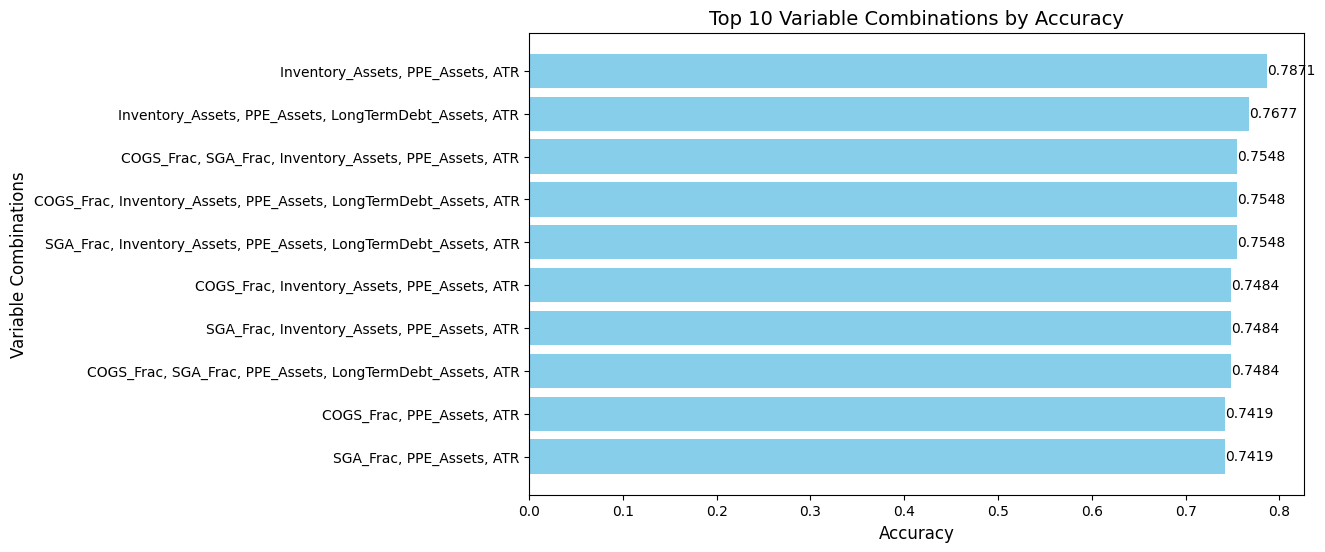
**Interpretation and explanation of the recommended model:**
The recommended model, which includes the variables 'Inventory_Assets', 'PPE_Assets', and 'ATR', performs well for the following reasons:
- **Asset Management Efficiency:** These variables capture a company's ability to manage and utilize its assets effectively, which is crucial for financial performance and profitability.
- **Industry Characteristics:** The selected variables are relevant in distinguishing firms across different industries, such as metal mining, manufacturing, retail, and software development.
- **Cost Structure and Capital Intensity:** The variables provide insights into a company's cost structure, profit margins, and capital intensity, which are important determinants of profitability and financial performance across industries.

**Findings and Interpretations:**
- **Asset Management Efficiency:** The inclusion of 'Inventory_Assets', 'PPE_Assets', and 'ATR' in the top-performing models underscores the importance of efficient asset management and utilization in driving financial performance across industries.
- **Industry-specific Characteristics:** The scatter plots and the selected variables capture industry-specific characteristics and operational norms.
- **Trade-offs in Asset Composition:** A negative relationship was observed between inventory and PPE asset intensities, suggesting firms tend to be more intensive in one or the other type of operating assets based on their business models.
- **Cost Structure and Capital Intensity:** Variables like 'COGS_Frac', 'SGA_Frac', and 'LongTermDebt_Assets' provide insights into a company's cost structure, profit margins, and capital intensity.
- **Model Complexity and Parsimony:** While increasing the number of variables initially improved accuracy, adding more variables beyond a certain point did not lead to further enhancements.
- **Consistency across Modeling Techniques:** The importance of variables remained consistent across different modeling techniques (Logistic Regression, Decision Tree, and Random Forest), further reinforcing their significance in predicting the target variable.
Overall, the recommended model captures essential factors related to asset management efficiency, cost structure, capital intensity, and industry-specific characteristics, which are fundamental drivers of a company's financial performance and subsequent classification across different industries.
